# Data wrangling WeRateDogs

- Introduction
     The purpose of this project is to put in practice what I learned in data wrangling data section from Udacity Data Analysis Nanodegree program. The dataset that is wrangled is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs.

## Table of Contents
- Gathering data
- Assessing data
   - Quality
   - Tidiness
- Cleaning data
- Storing, Analyzing, and Visualizing
   - Insight one & visualization
   - Insight two
   - Insight three & visualization
   - Insight four & visualization

## Gathering data
  1. The WeRateDogs Twitter archive. I am giving this file to you, so imagine it as a file on hand. Download this file manually by clicking the following link: twitter_archive_enhanced.csv

  2. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

  3. Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

In [1]:
import pandas as pd
import numpy as np
import tweepy
import requests
import json
import re
import os
import matplotlib.pyplot as plt
from IPython.display import Image
import datetime
import seaborn as sns
from scipy import stats 
import warnings
warnings.filterwarnings('ignore')
% matplotlib inline
from tweepy import OAuthHandler
from timeit import default_timer as timer

1. Twitter archive file

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Tweet image prediction

In [3]:
#URL downloaded programatically 
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [4]:
# Putting contents of the downloaded file into a data frame, using the read_csv-function. 
# A tsv-file differs only by the separator from a csv-file.
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Twitter API & JSON

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
df_list = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        followers_count = tweet['user']['followers_count']
        date_time = tweet['created_at'] # The date and time of the creation
        df_list.append({'tweet_id':tweet_id,
                       'retweets': retweet_count,
                       'favorite_count': favorite_count,
                       'followers_count': followers_count })
api_tweet = pd.DataFrame(df_list, columns = ['tweet_id', 'retweets', 'favorite_count',
                                               'followers_count'])
api_tweet.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)        
api_tweet.head()

,tweet_id,retweets,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


##  Assessing Data

In [6]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
sum(twitter_archive['tweet_id'].duplicated())

0

In [9]:
sum(twitter_archive['text'].duplicated())

0

In [10]:
sum(twitter_archive['expanded_urls'].duplicated())

137

In [11]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [13]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [14]:
twitter_archive[twitter_archive['rating_numerator'] > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [15]:
twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [16]:
twitter_archive[twitter_archive['name'].apply(len) <= 2 ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
583,800188575492947969,NaN,NaN,2016-11-20 04:06:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He's a Benedoop Cum...,6.816941e+17,4.196984e+09,2015-12-29 04:31:49 +0000,https://twitter.com/dog_rates/status/681694085...,11,10,Bo,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
679,789137962068021249,NaN,NaN,2016-10-20 16:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's a West Congolese Bugaboop Snu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789137962...,12,10,Bo,None,None,None,None
686,788070120937619456,NaN,NaN,2016-10-17 17:32:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo and Ty. Bo eats pape...,7.610045e+17,4.196984e+09,2016-08-04 01:03:17 +0000,https://twitter.com/dog_rates/status/761004547...,11,10,Bo,None,None,None,None
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None


In [17]:
twitter_archive[twitter_archive['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [18]:
twitter_archive['expanded_urls'].value_counts()

https://twitter.com/dog_rates/status/866334964761202691/photo/1,https://twitter.com/dog_rates/status/866334964761202691/photo/1                                                                                                                                                                              2
https://twitter.com/dog_rates/status/694669722378485760/photo/1,https://twitter.com/dog_rates/status/694669722378485760/photo/1                                                                                                                                                                              2
https://www.loveyourmelon.com/pages/ourstory,https://twitter.com/dog_rates/status/820314633777061888/photo/1,https://twitter.com/dog_rates/status/820314633777061888/photo/1,https://twitter.com/dog_rates/status/820314633777061888/photo/1                                                                 2
http://www.gofundme.com/bluethewhitehusky,https://twitter.com/dog_rates/status/831650051525

In [19]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [20]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
image_predictions['jpg_url'].value_counts()

https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg                                            2
https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg                                            2
https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg                                            2
https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg                                            2
https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg                                            2
https://pbs.twimg.com/media/CvT6IV6WEAQhhV5.jpg                                            2
https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg                                            2
https://pbs.twimg.com/media/Ct2qO5PXEAE6eB0.jpg                                            2
https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg                                            2
https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg                                            2
https://pbs.twimg.com/media/CvJCabcWgAIoUxW.jpg                       

In [22]:
sum(image_predictions['jpg_url'].duplicated())

66

In [23]:
image_predictions['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [24]:
api_tweet

,tweet_id,retweets,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889
5,891087950875897856,3261,20562,3200889
6,890971913173991426,2158,12041,3200889
7,890729181411237888,16716,56848,3200889
8,890609185150312448,4429,28226,3200889
9,890240255349198849,7711,32467,3200889


In [25]:
api_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id           2354 non-null int64
retweets           2354 non-null int64
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
dtypes: int64(4)
memory usage: 73.6 KB


In [26]:
sum(api_tweet['tweet_id'].duplicated())

0

In [27]:
all_columns = pd.Series(list(twitter_archive) + list(image_predictions) + list(api_tweet))
all_columns[all_columns.duplicated()]


17    tweet_id
29    tweet_id
dtype: object

## Assessing Summary

### Quality
#### twitter_archive
- Keep original ratings (no retweets) that have images
- Delete columns that won't be used for analysis
- Convert data type in 'tweet_id' column from a integer to string.
- the timestamp should be date-time instead of an object (string).
- In several columns, null objects are non-null (None to NaN).
- The NA value in the name column is not inaccurate data format.
- There are many invalid names ('just, 'None', 'a', 'an', 'all').- We only want original rating tweets, not retweets.
- Sources are not readable.
- Erroneous data types (doggo, floofer, pupper and puppo columns)
- The numerator and denominator columns have invalid values.
- Extract the rating numerator from the 'text' column because some values in the 'rating_numerator' column are wrong.
- Convert the data type in both 'rating_numerator' and 'rating_denominator' columns as a float.

#### image_predictions
- Some tweet_ids have the same jpg_url and drop it
- Simplify the table by keeping only one prediction, according to the odds priority order is as p1 > p2 > p3;
- Convert data type in 'tweet_id' column from a integer to string.
#### Api_tweet
- Convert data type in 'tweet_id' column from integer to string.

### Tidiness
- Merge dog stage column into a single column instead of 4 columns (doggo, floofer, pupper, puppo)
- Consolidate the 3 tables.

## Cleaning

In [28]:
twitter_archive_clean=twitter_archive.copy()

In [29]:
image_predictions_clean=image_predictions.copy()

In [30]:
api_tweet_clean =api_tweet.copy()

### Define

- Merge tweet_info and image_predictions into twitter_archive

### Code

In [31]:
twitter_archive_clean = pd.merge(left=twitter_archive_clean,
                                 right=api_tweet_clean, left_on='tweet_id', right_on='tweet_id', how='inner')
twitter_archive_clean = twitter_archive_clean.merge(image_predictions_clean, on='tweet_id', how='inner')

### Test

In [32]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 31 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
retweets                      2073 

### Define
- Move doggo, floofer, pupper and puppo columns into one column dog_stage.

### Code

In [33]:
twitter_archive_clean.doggo =twitter_archive_clean.doggo.str.replace('None' ,'')
twitter_archive_clean.floofer =twitter_archive_clean.floofer.str.replace('None' ,'')
twitter_archive_clean.pupper =twitter_archive_clean.pupper.str.replace('None' ,'')
twitter_archive_clean.puppo =twitter_archive_clean.puppo.str.replace('None' ,'')

In [34]:
twitter_archive_clean['dog_breed'] = twitter_archive_clean['doggo'] + twitter_archive_clean['puppo'] + twitter_archive_clean['floofer']+twitter_archive_clean['pupper']
twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'],axis =1 , inplace =True)

In [35]:
twitter_archive_clean.loc[twitter_archive_clean.dog_breed == 'doggopupper', 'dog_breed'] = 'doggo-pupper'
twitter_archive_clean.loc[twitter_archive_clean.dog_breed == 'doggofloofer', 'dog_breed'] = 'doggo-floofer'
twitter_archive_clean.loc[twitter_archive_clean.dog_breed == 'doggopuppo', 'dog_breed'] = 'doggo-puppo'
twitter_archive_clean.loc[twitter_archive_clean.dog_breed == "", 'dog_breed'] = 'None'

### Test

In [36]:
pd.unique(twitter_archive_clean['dog_breed'])

array(['None', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo-puppo',
       'doggo-floofer', 'doggo-pupper'], dtype=object)

In [37]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,None


In [38]:
twitter_archive_clean.dog_breed.value_counts()

None             1753
pupper            210
doggo              67
puppo              23
doggo-pupper       11
floofer             7
doggo-floofer       1
doggo-puppo         1
Name: dog_breed, dtype: int64

In [39]:
list(twitter_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'retweets',
 'favorite_count',
 'followers_count',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'dog_breed']

### Define
- There are many invalid names ('just, 'None', 'a', 'an', 'all')

### Code

In [40]:
twitter_archive_clean['name'].value_counts

<bound method IndexOpsMixin.value_counts of 0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Gerald
20       Jeffrey
21          such
22        Canela
23          None
24          None
25          Maya
26        Mingus
27         Derek
28        Roscoe
29       Waffles
          ...   
2043       quite
2044           a
2045        None
2046        None
2047        None
2048        None
2049        None
2050          an
2051           a
2052          an
2053        None
2054        None
2055        None
2056        None
2057        None
2058        None
2059        None
2060        None
2061        None
2062         the
2063         the
2064           a
2065           a
2066          an
2067           a
2068

In [41]:
pattern = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, row in twitter_archive_clean.iterrows():  
    try:
        if row['name'] == "a":
            c_name = re.findall(pattern, row['text'])[0]
            twitter_archive_clean.loc[index,'name'] = twitter_archive_clean.loc[index,'name'].replace('a', c_name)
        elif row['name'] == 'an':
            c_name = re.findall(pattern, row['text'])[0]
            twitter_archive_clean.loc[index,'name'] = twitter_archive_clean.loc[index,'name'].replace('an', c_name)
    except IndexError:
        twitter_archive_clean.loc[index,'name'] = np.nan

### Test

In [42]:
twitter_archive_clean.name.value_counts(dropna = False)

None              577
NaN                41
Charlie            11
Tucker             10
Lucy               10
Cooper             10
Penny              10
Oliver             10
Lola                8
Winston             8
Bo                  8
Sadie               8
the                 7
Toby                7
Daisy               7
Jax                 6
Koda                6
Bella               6
Dave                6
Milo                6
Rusty               6
Stanley             6
Bailey              6
Scout               6
Chester             5
Louis               5
Buddy               5
Oscar               5
Larry               5
Alfie               5
                 ... 
Stephanus           1
Heinrich            1
Harlso              1
Thor                1
Bobble              1
Tango               1
Michelangelope      1
Timmy               1
Sprinkles           1
Bubba               1
Clarq               1
Maya                1
Al                  1
Patch               1
Timison   

### Define
- Some tweet_ids have the same jpg_url and drop it

### Code

In [43]:
sum(twitter_archive_clean['jpg_url'].duplicated())

65

In [44]:
#CODE: Delete duplicated jpg_url
twitter_archive_clean = twitter_archive_clean.drop_duplicates(subset=['jpg_url'], keep='last')

### Test

In [45]:
sum(twitter_archive_clean['jpg_url'].duplicated())

0

In [46]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 0 to 2072
Data columns (total 28 columns):
tweet_id                      2008 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2008 non-null object
source                        2008 non-null object
text                          2008 non-null object
retweeted_status_id           14 non-null float64
retweeted_status_user_id      14 non-null float64
retweeted_status_timestamp    14 non-null object
expanded_urls                 2008 non-null object
rating_numerator              2008 non-null int64
rating_denominator            2008 non-null int64
name                          1968 non-null object
retweets                      2008 non-null int64
favorite_count                2008 non-null int64
followers_count               2008 non-null int64
jpg_url                       2008 non-null object
img_num                       2008 non

### Define

- Simplify the table by keeping only one prediction, according to the odds priority order is as p1 > p2 > p3;
- Delete image prediction columns

### Code

In [47]:
# Append the first True predection to the list 'perdictions' and the level appended to list 'confidence_level',
# Otherwise, will append NaN.
dog_types = []
confidence_level = []

def prediction_func(dataframe):
    if dataframe['p1_dog'] == True:
        dog_types.append(dataframe['p1'])
        confidence_level.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        dog_types.append(dataframe['p2'])
        confidence_level.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        dog_types.append(dataframe['p3'])
        confidence_level.append(dataframe['p3_conf'])
    else:
        dog_types.append('NaN')
        confidence_level.append(0)

twitter_archive_clean.apply(prediction_func, axis=1)
twitter_archive_clean['dog_types'] = dog_types
twitter_archive_clean['confidence_level'] = confidence_level

# Delete columns
twitter_archive_clean = twitter_archive_clean.drop(['img_num','p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
                                                    'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

### Test

In [48]:
list(twitter_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'retweets',
 'favorite_count',
 'followers_count',
 'jpg_url',
 'dog_breed',
 'dog_types',
 'confidence_level']

### Define
- Fix rating numerator and denominators that are not ratings


### Code

In [49]:
# Calculating the dogs counts in the tweets featuring many dogs
dogs_count = twitter_archive_clean['rating_denominator'].loc[twitter_archive_clean['rating_denominator']>= 30]/10

# Check the dog_count with their indices:
print(dogs_count)

# Performing the Calculations

twitter_archive_clean.loc[twitter_archive_clean.rating_numerator >= 30, ['rating_numerator', 'rating_denominator']] = [twitter_archive_clean.rating_numerator[twitter_archive_clean.rating_numerator >= 30]/dogs_count , 10]

345      7.0
734     15.0
924     17.0
1001     5.0
1022     9.0
1047     8.0
1065     5.0
1131     5.0
1207     4.0
1379    13.0
1380    11.0
1512    12.0
1571     8.0
Name: rating_denominator, dtype: float64


### Test

In [50]:
twitter_archive_clean['rating_numerator'].value_counts()

12.0    458
10.0    423
11.0    403
13.0    264
9.0     152
8.0      95
7.0      52
14.0     37
5.0      34
6.0      32
3.0      19
4.0      16
2.0       9
1.0       5
0.0       2
15.0      1
27.0      1
26.0      1
24.0      1
Name: rating_numerator, dtype: int64

### Define
Make the source column readable by replacing the urls in it by the source name and change its datatype to category.

### Code

In [51]:
#the source column has only 3 different values, thus assigning each value to a different variable  
a = '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
b = '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a> '
c = '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'
d = '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'

In [52]:
#using the variables created above in the replace function 
twitter_archive_clean.source = twitter_archive_clean.source.replace(a, 'Twitter for iPhone')
twitter_archive_clean.source = twitter_archive_clean.source.replace(b, 'Vine - Make a Scene')
twitter_archive_clean.source = twitter_archive_clean.source.replace(c, 'Twitter Web Client')
twitter_archive_clean.source = twitter_archive_clean.source.replace(d, 'TweetDeck')

### Test

In [53]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone    1967
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64

### Define
- Remove all the retweets by removing all the rows with non null values in retweeted_status_id.

### Code

In [54]:
#subsetting the table over all the rows having null values in the retweeted_status_id column
#Retweets:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

### Test

In [55]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 20 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1991 non-null float64
rating_denominator            1994 non-null int64
name                          1954 non-null object
retweets                      1994 non-null int64
favorite_count                1994 non-null int64
followers_count               1994 non-null int64
jpg_url                       1994 non-null object
dog_breed                     1994 non-

### Define
- Drop the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns.

### Code

In [56]:
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
                                                      'retweeted_status_id', 'retweeted_status_user_id',
                                                      'retweeted_status_timestamp'], axis = 1)

### Test

In [57]:
twitter_archive_clean.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweets,favorite_count,followers_count,jpg_url,dog_breed,dog_types,confidence_level
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,8853,39467,3200889,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,NaN,0.000000
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,6514,33819,3200889,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,None,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,4328,25461,3200889,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,None,Chihuahua,0.716012


### Define
- Change Datatypes

### Code

In [58]:
#changing the datatype of dog_type to category
twitter_archive_clean.dog_breed = twitter_archive_clean.dog_breed.astype('category')
twitter_archive_clean.dog_types = twitter_archive_clean.dog_types.astype('category')
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp, yearfirst = True)
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.astype(float)
twitter_archive_clean.rating_denominator = twitter_archive_clean.rating_numerator.astype(float)

### Test

In [59]:
twitter_archive_clean.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator             float64
rating_denominator           float64
name                          object
retweets                       int64
favorite_count                 int64
followers_count                int64
jpg_url                       object
dog_breed                   category
dog_types                   category
confidence_level             float64
dtype: object

### Store

In [60]:
twitter_archive_clean.drop(twitter_archive_clean.columns[twitter_archive_clean.columns.str.contains('Unnamed',case = False)],axis = 1)
twitter_archive_clean.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index=False)

twitter_archive_master = pd.read_csv('twitter_archive_master.csv')
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1991 non-null float64
rating_denominator    1991 non-null float64
name                  1954 non-null object
retweets              1994 non-null int64
favorite_count        1994 non-null int64
followers_count       1994 non-null int64
jpg_url               1994 non-null object
dog_breed             1994 non-null object
dog_types             1686 non-null object
confidence_level      1994 non-null float64
dtypes: float64(3), int64(4), object(8)
memory usage: 233.8+ KB


In [61]:
#changing the datatype of dog_type to category
twitter_archive_master['dog_breed'] = twitter_archive_master['dog_breed'].astype('category')
twitter_archive_master['dog_types'] = twitter_archive_master['dog_types'].astype('category')
twitter_archive_master['tweet_id'] = twitter_archive_master['tweet_id'].astype(str)
twitter_archive_master['source'] = twitter_archive_master['source'].astype('category')
twitter_archive_master['timestamp'] = pd.to_datetime(twitter_archive_master['timestamp'], yearfirst = True)
twitter_archive_master['rating_numerator'] = twitter_archive_master['rating_numerator'].astype(float)
twitter_archive_master['rating_denominator'] = twitter_archive_master['rating_numerator'].astype(float)

## Analyzing & Visualizng Data

##### The dataset respectively the data frame df_twitter_combined is now ready for analysis.

In [62]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweets,favorite_count,followers_count,jpg_url,dog_breed,dog_types,confidence_level
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,13.0,Phineas,8853,39467,3200889,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,NaN,0.000000
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,13.0,Tilly,6514,33819,3200889,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,None,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,12.0,Archie,4328,25461,3200889,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,None,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,13.0,Darla,8964,42908,3200889,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,None,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,12.0,Franklin,9774,41048,3200889,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,None,basset,0.555712


In [63]:
twitter_archive_master.describe()

,rating_numerator,rating_denominator,retweets,favorite_count,followers_count,confidence_level
count,1991.000000,1991.000000,1994.000000,1994.000000,1.994000e+03,1994.000000
mean,10.564038,10.564038,2766.753260,8895.725677,3.200946e+06,0.464991
std,2.270588,2.270588,4674.698447,12213.193181,4.478196e+01,0.339470
min,0.000000,0.000000,16.000000,81.000000,3.200799e+06,0.000000
25%,10.000000,10.000000,624.750000,1982.000000,3.200901e+06,0.140466
50%,11.000000,11.000000,1359.500000,4136.000000,3.200947e+06,0.459130
75%,12.000000,12.000000,3220.000000,11308.000000,3.201002e+06,0.776387
max,27.000000,27.000000,79515.000000,132810.000000,3.201018e+06,0.999956


##### Question 1: What is the Most common Dog Type?

In [64]:
twitter_archive_master['dog_types'].value_counts().head(10)

golden_retriever      158
Labrador_retriever    108
Pembroke               95
Chihuahua              91
pug                    62
toy_poodle             51
chow                   48
Pomeranian             42
Samoyed                42
malamute               33
Name: dog_types, dtype: int64

In [65]:
twitter_archive_master.query('dog_types=="golden_retriever"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweets,favorite_count,followers_count,jpg_url,dog_breed,dog_types,confidence_level
14,889531135344209921,2017-07-24 17:02:04,Twitter for iPhone,This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13.0,13.0,Stuart,2321,15359,3200889,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,puppo,golden_retriever,0.953442
16,888917238123831296,2017-07-23 00:22:39,Twitter for iPhone,This is Jim. He found a fren. Taught him how t...,https://twitter.com/dog_rates/status/888917238...,12.0,12.0,Jim,4709,29611,3200889,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,None,golden_retriever,0.714719
17,888804989199671297,2017-07-22 16:56:37,Twitter for iPhone,This is Zeke. He has a new stick. Very proud o...,https://twitter.com/dog_rates/status/888804989...,13.0,13.0,Zeke,4559,26080,3200889,https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg,None,golden_retriever,0.469760
39,883482846933004288,2017-07-08 00:28:19,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5.0,5.0,Bella,10407,46860,3200890,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,None,golden_retriever,0.943082
41,883117836046086144,2017-07-07 00:17:54,Twitter for iPhone,Please only send dogs. We don't rate mechanics...,https://twitter.com/dog_rates/status/883117836...,13.0,13.0,None,6949,37914,3200890,https://pbs.twimg.com/media/DEF2-_hXoAAs62q.jpg,None,golden_retriever,0.949562
45,882268110199369728,2017-07-04 16:01:23,Twitter for iPhone,This is Alfy. You're witnessing his first wate...,https://twitter.com/dog_rates/status/882268110...,13.0,13.0,Alfy,12118,45880,3200890,https://pbs.twimg.com/media/DD5yKdPW0AArzX8.jpg,None,golden_retriever,0.762211
46,882045870035918850,2017-07-04 01:18:17,Twitter for iPhone,"This is Koko. Her owner, inspired by Barney, r...",https://twitter.com/dog_rates/status/882045870...,13.0,13.0,Koko,5203,29900,3200890,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,None,golden_retriever,0.006941
53,880465832366813184,2017-06-29 16:39:47,Twitter for iPhone,This is Bella. She had her first beach experie...,https://twitter.com/dog_rates/status/880465832...,12.0,12.0,Bella,6546,29075,3200890,https://pbs.twimg.com/media/DDgK-J4XUAIEV9W.jpg,None,golden_retriever,0.913255
70,876484053909872640,2017-06-18 16:57:37,Twitter for iPhone,This is Benedict. He wants to thank you for th...,https://twitter.com/dog_rates/status/876484053...,13.0,13.0,Benedict,2511,19163,3200891,https://pbs.twimg.com/media/DCnll_dUQAAkBdG.jpg,None,golden_retriever,0.874566
93,870374049280663552,2017-06-01 20:18:38,Twitter for iPhone,This is Zoey. She really likes the planet. Wou...,https://twitter.com/dog_rates/status/870374049...,13.0,13.0,Zoey,27680,85011,3200891,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,None,golden_retriever,0.841001


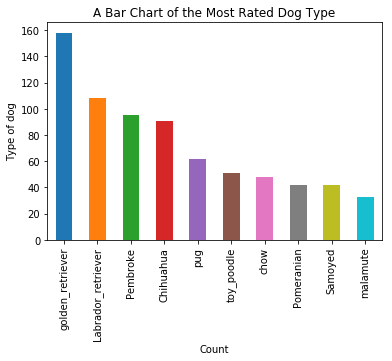

In [66]:
twitter_archive_master['dog_types'].value_counts().head(10).plot(kind='bar')

plt.title('A Bar Chart of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('output.jpg',bbox_inches='tight');

##### **Insight:**  **Golden retriever** is the most common dog in this dataset.

##### Question 2: What were the highest rated dog types?

In [67]:
twitter_archive_master.groupby('dog_types')['rating_numerator'].mean().sort_values(ascending = False)

dog_types
clumber                        27.000000
Bouvier_des_Flandres           13.000000
Saluki                         12.500000
briard                         12.333333
Tibetan_mastiff                12.250000
Border_terrier                 12.142857
standard_schnauzer             12.000000
silky_terrier                  12.000000
Gordon_setter                  11.750000
Irish_setter                   11.750000
Samoyed                        11.690476
kuvasz                         11.611111
golden_retriever               11.607595
Australian_terrier             11.500000
giant_schnauzer                11.500000
wire-haired_fox_terrier        11.500000
Great_Pyrenees                 11.466667
Norfolk_terrier                11.428571
chow                           11.416667
Pembroke                       11.410526
Eskimo_dog                     11.409091
Greater_Swiss_Mountain_dog     11.333333
Doberman                       11.333333
Leonberg                       11.333333
cocker

In [68]:
twitter_archive_master[twitter_archive_master['rating_numerator'] == twitter_archive_master['rating_numerator'].max()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweets,favorite_count,followers_count,jpg_url,dog_breed,dog_types,confidence_level
553,778027034220126208,2016-09-20 00:24:34,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27.0,27.0,Sophie,1885,7320,3200810,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,pupper,clumber,0.946718


In [69]:
Image(filename="clumber.jpg",url='https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg')

In [70]:
twitter_archive_master.loc[twitter_archive_master['dog_types'] == 'Japanese_spaniel', 'jpg_url']

1451    https://pbs.twimg.com/media/CWZBsjPWsAAZFFl.jpg
Name: jpg_url, dtype: object

In [71]:
Image(url=' https://pbs.twimg.com/media/CWZBsjPWsAAZFFl.jpg')

##### **Insight:** The highest rated dog type is the **clumber**. Surprisingly, its average rating is 27/10. and  **Japanese_spaniel** has the lowest average rating


#### Question 3: Which are the top 10 predictated dog types in terms of the confidence-level on average?

In [72]:
twitter_archive_master.groupby('dog_types')['confidence_level'].mean().sort_values(ascending = False).head(10)

dog_types
komondor                   0.972531
clumber                    0.946718
keeshond                   0.844431
bull_mastiff               0.815618
Brittany_spaniel           0.775591
Bernese_mountain_dog       0.766685
Samoyed                    0.717440
Blenheim_spaniel           0.699588
German_shepherd            0.694426
black-and-tan_coonhound    0.692000
Name: confidence_level, dtype: float64

In [73]:
twitter_archive_master[twitter_archive_master['confidence_level'] == twitter_archive_master['confidence_level'].max()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweets,favorite_count,followers_count,jpg_url,dog_breed,dog_types,confidence_level
1846,668636665813057536,2015-11-23 03:46:18,Twitter for iPhone,This is an Irish Rigatoni terrier named Berta....,https://twitter.com/dog_rates/status/668636665...,10.0,10.0,Berta,528,1114,3201014,https://pbs.twimg.com/media/CUd5gBGWwAA0IVA.jpg,None,komondor,0.999956


In [74]:
Image(filename="Komondor.jpg",url='https://pbs.twimg.com/media/CUd5gBGWwAA0IVA.jpg')

##### **Insight:** The highest average confidence level in predicting the dog breed experienced the komondor Dog. The second is the clumber. Both breeds have a unique appearance, which probably made the prediction easier. The highest confidence level is 97% on average, which should be kept in mind. In my opinion, the level is too low, to really rely on these results. For deeper analysis, you should consider running the images through a model which is either dedicated to dogs only or which is trained better.

#### Question 4: Which dog types have the highest average retweet and favorite-count, according to the prediction with the highest confidence level?

In [75]:
twitter_archive_master.groupby('dog_types')['jpg_url'].count()

dog_types
Afghan_hound                        3
Airedale                           12
American_Staffordshire_terrier     16
Appenzeller                         2
Australian_terrier                  2
Bedlington_terrier                  6
Bernese_mountain_dog               11
Blenheim_spaniel                   10
Border_collie                      12
Border_terrier                      7
Boston_bull                        12
Bouvier_des_Flandres                1
Brabancon_griffon                   3
Brittany_spaniel                    8
Cardigan                           21
Chesapeake_Bay_retriever           31
Chihuahua                          91
Dandie_Dinmont                      7
Doberman                            9
English_setter                      8
English_springer                   10
EntleBucher                         1
Eskimo_dog                         22
French_bulldog                     31
German_shepherd                    21
German_short-haired_pointer         8
Go

In [76]:
heighest_retweets=twitter_archive_master.groupby('dog_types')['retweets'].mean().sort_values(ascending = False).head(15)
heighest_retweets

dog_types
Bedlington_terrier       7510.166667
Afghan_hound             5976.000000
standard_poodle          5508.909091
English_springer         5401.600000
Saluki                   5133.750000
French_bulldog           5039.677419
cocker_spaniel           4858.100000
Samoyed                  4843.952381
whippet                  4840.272727
Great_Pyrenees           4533.866667
flat-coated_retriever    4520.250000
Irish_water_spaniel      4500.666667
Bouvier_des_Flandres     4479.000000
Mexican_hairless         4254.857143
Eskimo_dog               4235.590909
Name: retweets, dtype: float64

In [77]:
twitter_archive_master.loc[twitter_archive_master['dog_types'] == 'Bedlington_terrier', 'jpg_url']

129       https://pbs.twimg.com/media/C_EyeKuXkAAdxY-.jpg
177       https://pbs.twimg.com/media/C8V0aI5V0AAgO9m.jpg
278       https://pbs.twimg.com/media/C38Asz1WEAAvzj3.jpg
699     https://pbs.twimg.com/ext_tw_video_thumb/75233...
815       https://pbs.twimg.com/media/Cj6O1G9UYAAIU-1.jpg
1424    https://pbs.twimg.com/ext_tw_video_thumb/67839...
Name: jpg_url, dtype: object

In [78]:
Image(url=' https://pbs.twimg.com/media/C_EyeKuXkAAdxY-.jpg')

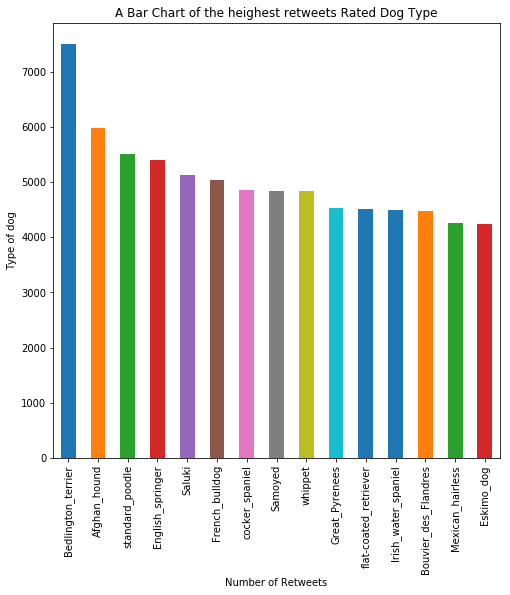

In [79]:
heighest_retweets.plot(kind='bar',figsize=(8,8))

plt.title('A Bar Chart of the heighest retweets Rated Dog Type')
plt.xlabel('Number of Retweets')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('output2.jpg',bbox_inches='tight');

In [80]:
heighest_favourites=twitter_archive_master.groupby('dog_types')['favorite_count'].mean().sort_values(ascending = False).head(10)
heighest_favourites

dog_types
Saluki                     24060.000000
Bedlington_terrier         21153.166667
French_bulldog             18416.806452
Bouvier_des_Flandres       18032.000000
Afghan_hound               17326.666667
black-and-tan_coonhound    17012.000000
flat-coated_retriever      16791.625000
Irish_water_spaniel        16400.000000
Leonberg                   14934.333333
English_springer           14138.300000
Name: favorite_count, dtype: float64

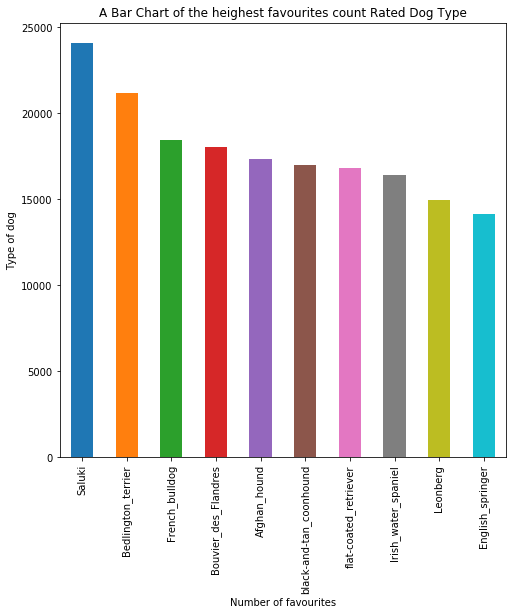

In [81]:
heighest_favourites.plot(kind='bar',figsize=(8,8))

plt.title('A Bar Chart of the heighest favourites count Rated Dog Type')
plt.xlabel('Number of favourites')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('output3.jpg',bbox_inches='tight');

##### **Insight:** On average the Bedlington_terrier appears to be retweeted most, whereas the Saluki appears to have earned the most favorites by far. However, you can see, that many breeds are in both top ten listings present. This might be a hint of a potential correlation between these variables.

#### Question 5: What is the relation between Retweets & Likes?

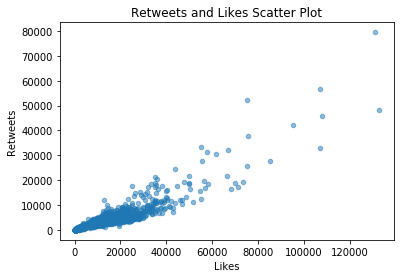

In [82]:
twitter_archive_master.plot(kind='scatter',x='favorite_count',y='retweets', alpha = 0.5)

plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.title('Retweets and Likes Scatter Plot')

plt.savefig('Retweets_vs_Likes.jpg', bbox_inches='tight')

In [83]:
twitter_archive_master['favorite_count'].corr(twitter_archive_master['retweets'])

0.91294662741837007

##### **Insight:**  the variable retweet and favorite count correlate strongly with each other (0.912). It appears the viewers of the WeRateDogs Twitter account express their liking using both ways.

#### Question 6: what is the most dog breed? 

In [84]:
twitter_archive_master['dog_breed'].value_counts()

None             1688
pupper            203
doggo              63
puppo              22
doggo-pupper        9
floofer             7
doggo-puppo         1
doggo-floofer       1
Name: dog_breed, dtype: int64

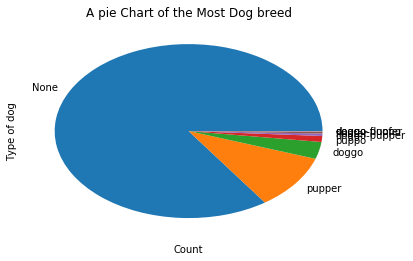

In [85]:
twitter_archive_master['dog_breed'].value_counts().plot(kind='pie')

plt.title('A pie Chart of the Most Dog breed')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('output4.jpg',bbox_inches='tight');

pupper is the most dog breed counting

#### Question 6: what is the most dog breed rating? 

In [86]:
twitter_archive_master.groupby(['dog_breed'])['rating_numerator'].mean().sort_values(ascending = False)

dog_breed
doggo-puppo      13.000000
puppo            12.000000
floofer          12.000000
doggo            11.888889
doggo-pupper     11.000000
doggo-floofer    11.000000
pupper           10.714286
None             10.467656
Name: rating_numerator, dtype: float64

In [87]:
twitter_archive_master.groupby(['dog_breed'])['favorite_count'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_breed,,,,,,,,
None,1688.0,8478.924763,11208.822562,81.0,1717.25,3912.5,11017.00,107956.0
doggo,63.0,19356.380952,22208.483825,2593.0,8268.00,12376.0,20502.50,131075.0
doggo-floofer,1.0,17169.000000,NaN,17169.0,17169.00,17169.0,17169.00,17169.0
doggo-pupper,9.0,12533.111111,12216.210904,4849.0,7039.00,8992.0,10342.00,44619.0
doggo-puppo,1.0,47844.000000,NaN,47844.0,47844.00,47844.0,47844.00,47844.0
floofer,7.0,13206.000000,11258.315105,2262.0,5045.50,11302.0,17721.00,33345.0
pupper,203.0,7197.738916,10703.793028,693.0,2423.50,3226.0,7669.00,106827.0
puppo,22.0,21582.090909,28034.339585,3277.0,7043.50,13387.5,19691.25,132810.0


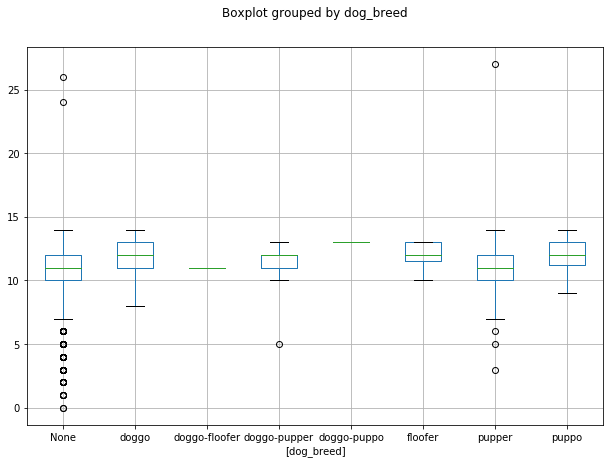

In [90]:
# Plot the dog stages with ratings
twitter_archive_master[twitter_archive_master['dog_breed'].notnull()].boxplot(column = ['rating_numerator'], by = ['dog_breed'], figsize=(10, 7))
plt.title('');
fig = plt.gcf() 
fig.savefig('output5.jpg',bbox_inches='tight');

However, pupper is not the most popular stage according to rating, whereas the doggo and puppo on average are on the top list.

#### Question 7: what is the most dog breed rating have the highest confidence level?

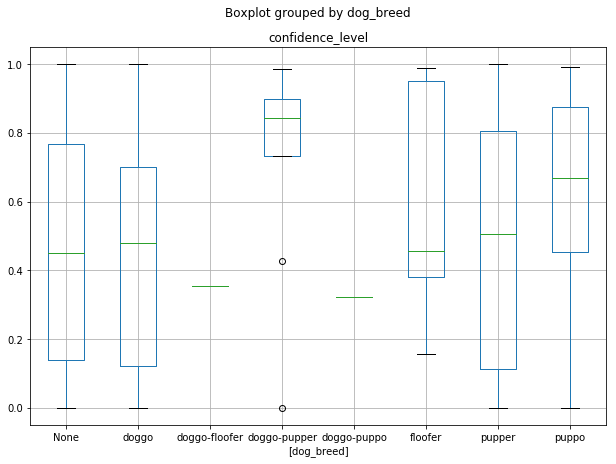

In [91]:
twitter_archive_master[twitter_archive_master['dog_breed'].notnull()].boxplot(column = ['confidence_level'], by = ['dog_breed'], figsize=(10, 7))
fig = plt.gcf() 
fig.savefig('output6.jpg',bbox_inches='tight');

Combination stage of doggo and puppo is correlated with the most accurate prediction odds among the all the potential stages，and it is much higher even than puppo which stand at the second place.